<a href="https://colab.research.google.com/github/56sarager/Simulation-Colabs/blob/main/Ising_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aim
To calculate the spin alignment behaviour and calculate the temperature of phase transition between
magnetic and chaotic in a regular lattice material.

#Ising Model


In [ ]:
import matplotlib.pyplot as plt
import scipy as sp
from scipy import interpolate
import numpy as np
from math import exp
from random import randrange, random, choice

class Lattice:
    def __init__(self, N, T, B=0, start='Low'):

        self.N = N # size of lattice
        self.B = B #strength of magnetic field
        self.T = T # temperature
        self.M = 0. # total magnetization
        self.E = 0. # total energy

        if start=='High':
            self.array=self.init_highT() # An array initialized at high temp
        elif start=='Low':
            self.array=self.init_lowT() # An array initialized at Low temp

        self.M_tot() # total magnetization
        self.E_tot() # total energy

        self.Mlist=[] #list that holds magnetization values
        self.Elist=[] #list that holds energy values

    def init_lowT(self): #generates an array of ones << this was the culprit?
        l = np.zeros((self.N,self.N),dtype=np.int64)
        for y in range(self.N):
            for x in range(self.N):
                l[x,y] = int(sp.sign(1))
        return l

    def init_highT(self):
        l = np.zeros((self.N,self.N),dtype=np.int64)
        for y in range(self.N):
            for x in range(self.N):
                l[x,y] = choice([1,-1])
        return l

    # calculates E for one element
    def E_elem(self,x,y):
        if self.B==0: #no magnetic field
            return (-1.0 * self.array[x,y]*(self.array[(x + 1) % self.N, y] +
                                            self.array[(x - 1 + self.N) % self.N, y] +
                                            self.array[x, (y + 1) % self.N] +
                                            self.array[x, (y - 1 + self.N) % self.N]))
        else: #there is a magnetic field
            return (-1.0 * self.array[x,y]*(self.array[(x + 1) % self.N, y] +
                                            self.array[(x - 1 + self.N) % self.N, y] +
                                            self.array[x, (y + 1) % self.N] +
                                            self.array[x, (y - 1 + self.N) % self.N]) +
                                            self.array[x,y]*self.B)
    # sums up potential of lattice
    def E_tot(self):
        en = 0
        for y in range(self.N):
            for x in range(self.N):
                en += self.E_elem(x,y)
        self.E = en

    # sums up magnetization of lattice
    def M_tot(self):
        mag = 0
        for y in range(self.N):
            for x in range(self.N):
                mag += self.array[x,y]
        self.M = mag

    def metropolis(self, steps):
        for i in range(steps):
        # choose random atom
            x = randrange(self.N)
            y = randrange(self.N)

            dE = -2* self.E_elem(x,y)

            if (dE <= 0):
                self.array [x,y] *= -1
                self.M += 2 * self.array[x,y]
                self.E += dE
                self.Mlist.append(self.M)
                self.Elist.append(self.E)

            elif random() < exp(-1.0 * dE/self.T):
                self.array[x,y] *= -1
                self.M += 2 * self.array[x,y]
                self.E += dE
                self.Mlist.append(self.M)
                self.Elist.append(self.E)

class plots:
    def __init__(self, N=10, B=0, start='Low',x0=1,x1=5,inc=0.1,steps=50000,T=1):
        self.N = N # size of lattice
        self.B = B #strength of magnetic field
        self.start = start
        self.inc = inc #size of increments in plots
        self.x0 = x0 #starting point of plots
        self.x1 = x1 #final point of plots
        self.steps=steps
        self.T=T
        self.title='atoms: {}, steps: {}, M field: {},\n init. at {} T, T inc. by {}'.format(self.N,self.steps,self.B,self.start,self.inc)

    def Norm(self,array): #normalizes an array
        Normalized_array=[1.0*i/self.N**2 for i in array]
        return Normalized_array

    def calc_spec_heat(self,en_list,T):
        avE=np.average(en_list)
        avE2=avE**2 # (average of E)^2
        av_E2=sum([i**2 for i in en_list])/len(en_list) #average of (E^2)
        C=(self.N**(-2)*(1.0/T)**2)*(av_E2-avE2) #specific heat capacity
        return C

    def calc_mag_sus(self,s_list,T): ##>> DOES NOT WORK !?!
        avS=np.average(s_list)
        avS2=avS**2 # (average of S)^2
        av_S2=sum([i**2 for i in s_list])/len(s_list) #average of (S^2)
        X=(self.N**(-2)*(1.0/T))*(av_S2-avS2) #magnetic susceptibilty
        return X

    def plot_array(self):
        plt.imshow(self.array)
        plt.title(self.title)

    def plot(self):
        plt.xlabel(self.labelx)
        plt.ylabel(self.labely)
        plt.title(self.title)
        plt.scatter(np.arange(self.x0,self.x1,self.inc),self.data)#,label='B field is {}'.format(self.B))


    def average(self,values): #values is a list of lists
        num=len(values)-1
        new_list=[]
        for i in range(len(values[0])):
            sum_=0
            for j in range(num):
                sum_+=values[j][i]
            new_list.append(sum_/num)
        return new_list

    def F_plot(self):
        plt.xlabel(self.labelx)
        plt.ylabel(self.labely)
        #plt.title(self.title)
        x=np.arange(self.x0,self.x1,self.inc)
        #x2=np.arange(self.x0,self.x1-1,self.inc/10.0)
        y=self.data
        fit = interpolate.interp1d(x, y)
        plt.plot(x,y,'o',x,fit(x),'-')

    def show(self):
        plt.legend()
        plt.show()

    def mag(self):
        T_list=[]
        for T in np.arange(self.x0,self.x1,self.inc):
            M = Lattice(self.N, T, start=self.start,B=self.B)
            M.metropolis(self.steps)
            T_list.append(np.absolute(np.average(M.Mlist)))
        self.data=plots.Norm(self,T_list)
        self.labelx='Temperature in units of kB/J'
        self.labely='magnetization'
        plots.plot(self)

    def E(self):
        T_list=[]
        for T in np.arange(self.x0,self.x1,self.inc):
            M = Lattice(self.N, T, start=self.start,B=self.B)
            M.metropolis(self.steps)
            T_list.append(np.average(M.Elist))
        self.data=plots.Norm(self,T_list)
        self.labelx='Temperature in units of kB/J'
        self.labely='Energy per atom'
        plots.plot(self)

    def spec_heat(self):
        T_list=[]
        for T in np.arange(self.x0,self.x1,self.inc):
            M = Lattice(self.N,T, start=self.start,B=self.B)
            M.metropolis(self.steps)
            T_list.append(plots.calc_spec_heat(self,M.Elist,T))
        self.data=plots.Norm(self,T_list)
        self.labelx='Temperature in units of kB/J'
        self.labely='Specific heat capacity per atom'
        plots.plot(self)

    def mag_sus(self):
        T_list=[]
        for T in np.arange(self.x0,self.x1,self.inc):
            M = Lattice(self.N,T, start=self.start,B=self.B)
            M.metropolis(self.steps)
            T_list.append(plots.calc_mag_sus(self,M.Mlist,T))
        self.data=plots.Norm(self,T_list)
        self.labelx='Temperature in units of kB/J'
        self.labely='Magnetic susceptibility per atom'
        plots.plot(self)

    def lattice(self):
        self.title='A 2D lattice of atomic spins equilibrated a fixed temperature of {},\n atoms: {}, init. at a {} temperature, M field: {}'.format(self.T,self.N,self.start,self.B)
        M = Lattice(self.N,self.T, start=self.start,B=self.B)
        M.metropolis(self.steps)
        self.array=M.array
        plots.plot_array(self)

    def F_mag(self,T): #magnetization at fixed temperature
        self.title='magnetization at a fixed temperature of {} with a varied magnetic field,\n atoms: {}, init. at {} T'.format(T,self.N,self.start)
        self.labelx='magnetic field'
        self.labely='magnetization'
        dump_list1=[]
        dump_list2=[]
        T_list=[]
        for B in np.arange(self.x0,self.x1,self.inc):
            M = Lattice(self.N,T,B=B,start=self.start)
            M.metropolis(self.steps)
            T_list.append(np.average(M.Mlist))
            #dump_list1.append(plots.Norm(self,T_list)[::-1])
        self.data=plots.Norm(self,T_list)[::-1]
        plots.F_plot(self)
        T_list=[]
        for B in np.arange(self.x1,2*self.x1,self.inc):
            self.B=B
            M = Lattice(self.N,T,B=B,start=self.start)
            M.metropolis(self.steps)
            T_list.append(np.average(M.Mlist))
            #~ #dump_list2.append(plots.Norm(self,T_list)[::-1])
        self.data=plots.Norm(self,T_list)
        plots.F_plot(self)

    def F_E(self,T): #Energy at fixed temperature
        self.title='Interaction energy at a fixed temperature of {},\n atoms: {}, init. at {} T'.format(T,self.N,self.start)
        self.labelx='number of steps'
        self.labely='Energy per atom'
        for B in np.arange(self.x0,self.x1,self.inc):
            self.B=B
            M = Lattice(self.N,T, start=self.start,B=self.B)
            M.metropolis(self.steps)
            T_list=M.Elist[::-1]
            self.data=plots.Norm(self,T_list)
            plots.F_plot(self)

    def retain_mag(self,T): #magnetization at fixed temperature
        self.title='magnetization at a fixed temperature of {} with a varied magnetic field,\n atoms: {}, init. at {} T'.format(T,self.N,self.start)
        self.labelx='magnetic field'
        self.labely='magnetization'
        T_list=[]
        for B in np.arange(self.x0,self.x1/2,self.inc):
            M = Lattice(self.N,T,B=B,start=self.start)
            M.metropolis(self.steps)
            T_list.append(np.average(M.Mlist))
        for i in np.arange(self.x1/2,self.x1,self.inc):
            M = Lattice(self.N,T,B=0,start=self.start)
            M.metropolis(self.steps)
            T_list.append(np.average(M.Mlist))
        self.data=plots.Norm(self,T_list)[::-1]
        plt.plot(self.data)
        T_list=[]

##To plot a lattice instantiate a plot object, keyword arguments include:
#N- size of lattice
#B- strength of magnetic field (default is zero)
#start- low(cold) or high(hot) start (default is low)
#inc- size of increments in plots (default is 0.01)
#x0- starting point of plots (default is 1)
#x1- final point of plots (default is 5)
#steps-number of steps (default is 50000)
#T - Temperature (default is 1)

##Some recipes to showcase how the program works

##Plots specific heat capacity with a cold start and with increments of 0.1 for a 10x10 lattice

#P=plots(N=10,start='Low',inc=0.1)
#P.spec_heat()
#P.show()

##Plots magnetization with with a hot start increments of 0.1 for a 15x15 lattice

#P=plots(N=15,start='Low',inc=0.1)
#P.mag()
#P.show()

##Plots lattice with a hot start, with and a 150x150 lattice and equilibrated at a temperature of 2

#P=plots(N=150,start='High',inc=0.1,T=2)
#P.lattice()
#P.show()

##Plots lattice with a hot start and with and a 100x100 lattice, with an external magnetic field of 1, and ran for 60000 steps

#P=plots(N=100,start='High',B=1,steps=60000)
#P.lattice()
#P.show()

#Experiments

##4.1.1 Magnetization versus Temperature for a Small Lattice

<ipython-input-31-038e3a1dedc0>:32: DeprecationWarning: scipy.sign is deprecated and will be removed in SciPy 2.0.0, use numpy.sign instead
  l[x,y] = int(sp.sign(1))


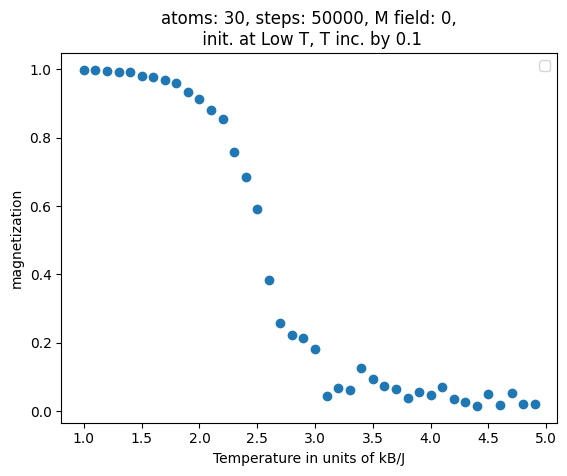

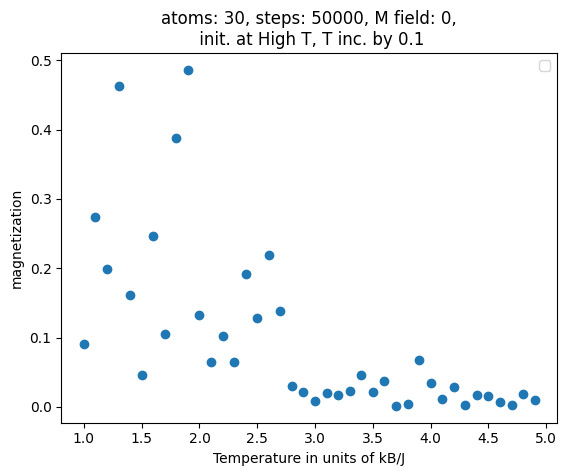

In [ ]:
exp1=plots(N=30,start='Low')
exp1.mag()
exp1.show()
exp1=plots(N=30,start='High')
exp1.mag()
exp1.show()

##4.1.2 Magnetic Susceptibility versus Temperature for a Larger Lattice

<ipython-input-11-038e3a1dedc0>:32: DeprecationWarning: scipy.sign is deprecated and will be removed in SciPy 2.0.0, use numpy.sign instead
  l[x,y] = int(sp.sign(1))


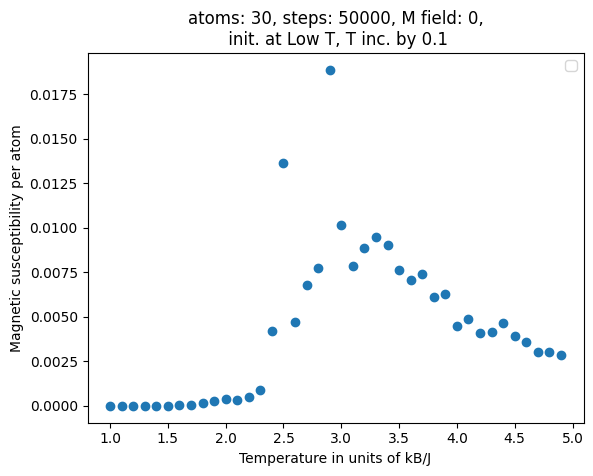

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
exp2=plots(N=30,start='Low')
exp2.mag_sus()
exp2.show()

##4.1.3 Map out the Spin Distribution at Fixed Temperatures

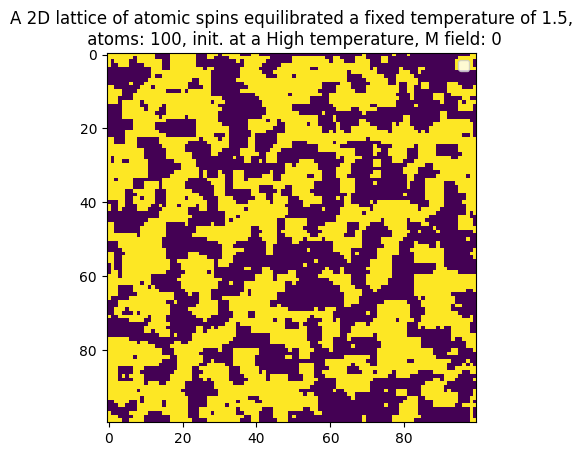

<ipython-input-31-038e3a1dedc0>:32: DeprecationWarning: scipy.sign is deprecated and will be removed in SciPy 2.0.0, use numpy.sign instead
  l[x,y] = int(sp.sign(1))


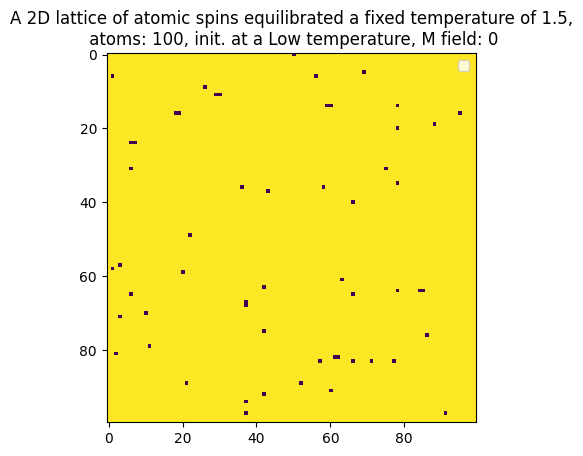

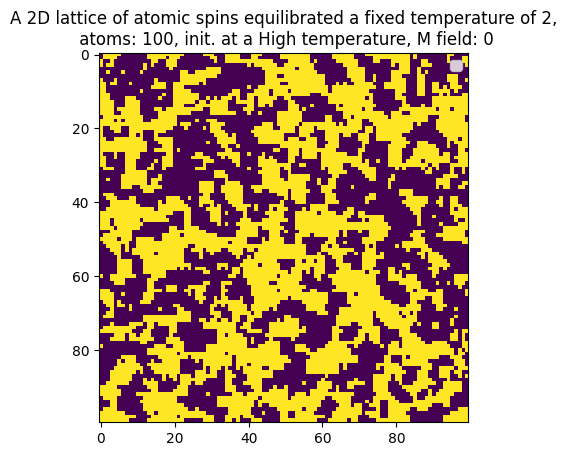

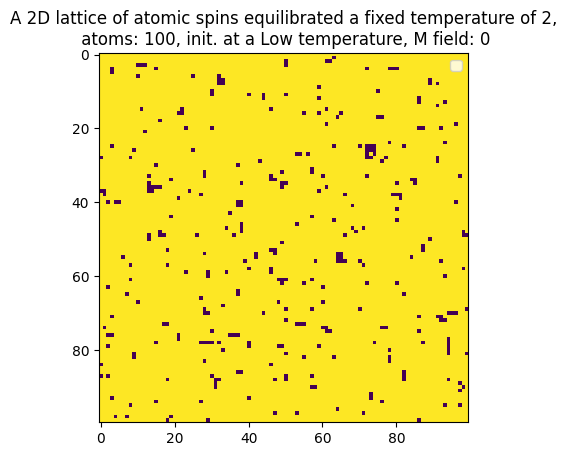

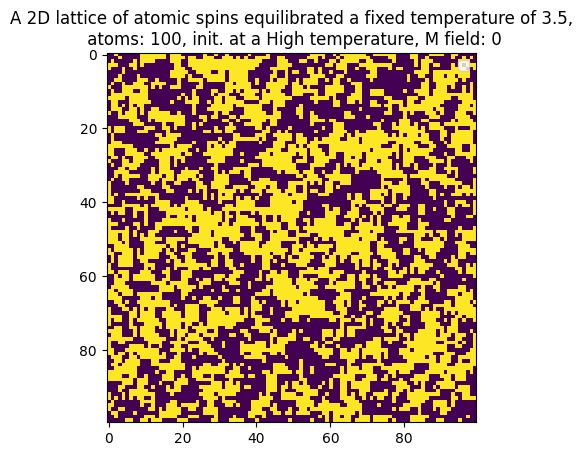

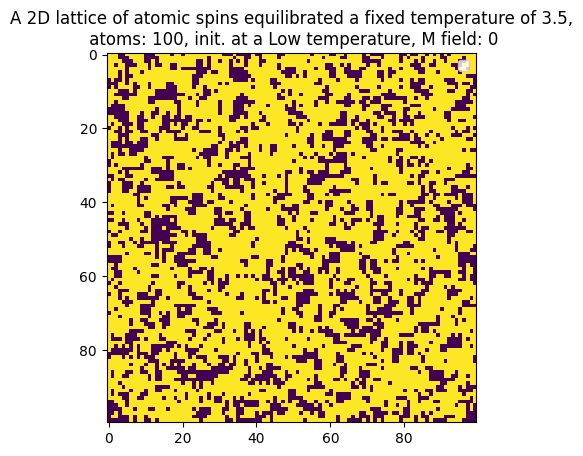

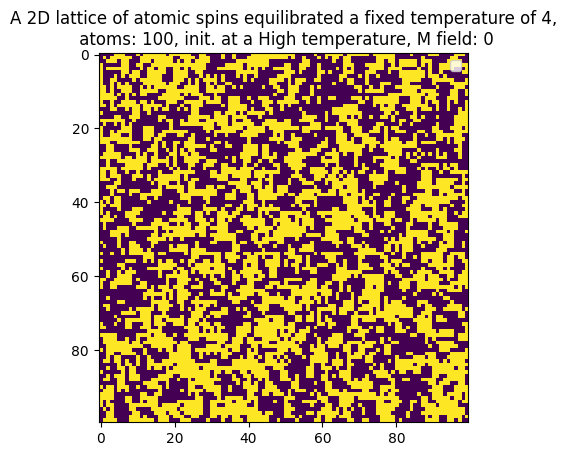

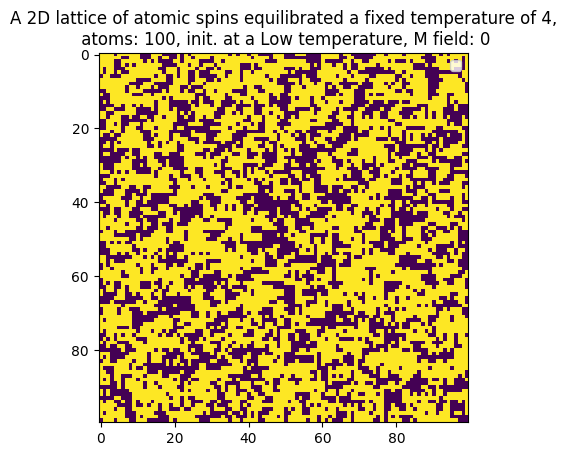

In [ ]:
temps=[1.5, 2, 3.5, 4]
for p in temps:
  exp3=plots(N=100,start='High',T=p)
  exp3.lattice()
  exp3.show()
  exp3=plots(N=100,start='Low',T=p)
  exp3.lattice()
  exp3.show()

##4.1.4 Including an External Magnetic Field

<ipython-input-31-038e3a1dedc0>:32: DeprecationWarning: scipy.sign is deprecated and will be removed in SciPy 2.0.0, use numpy.sign instead
  l[x,y] = int(sp.sign(1))


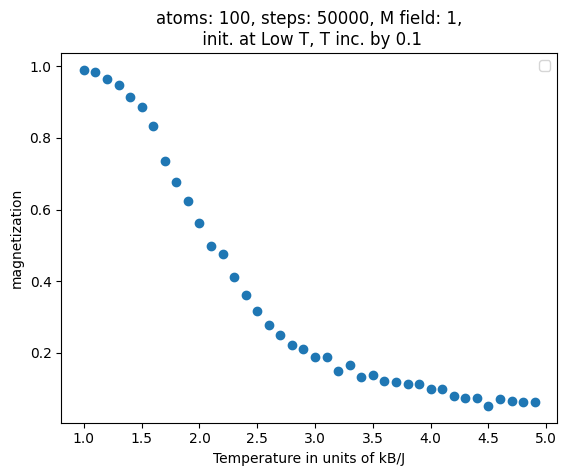

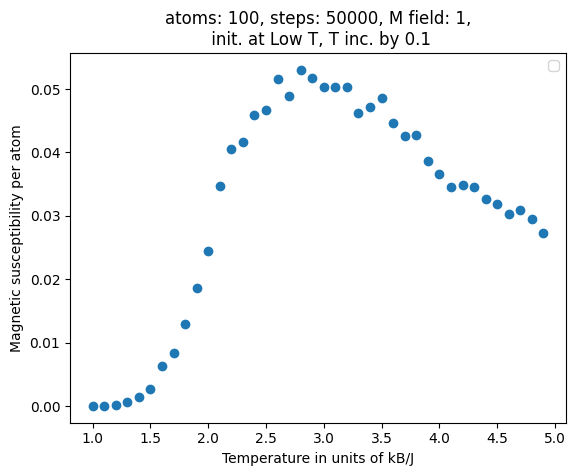

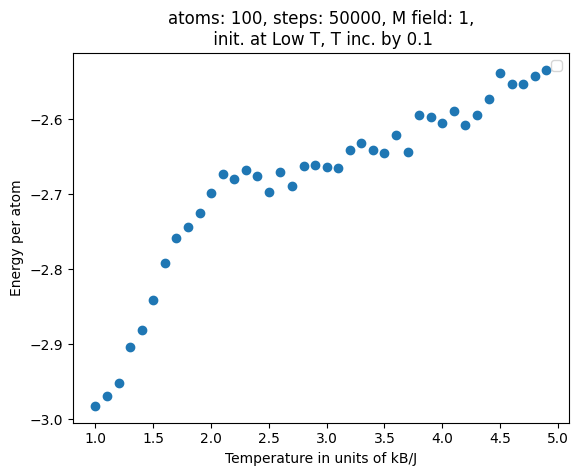

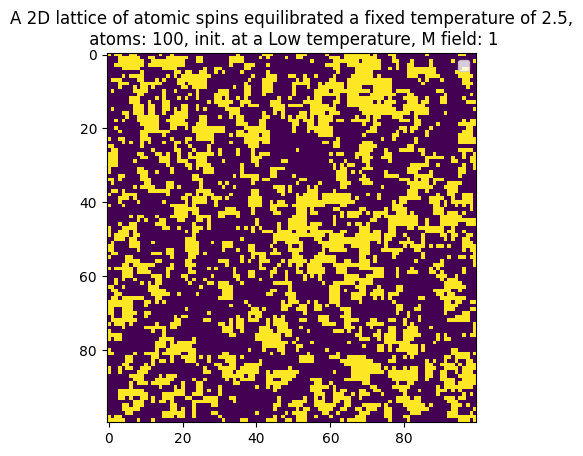

In [ ]:
exp4=plots(N=100,start='Low',T=2.5, B=1)
exp4.mag()
exp4.show()
exp4.mag_sus()
exp4.show()
exp4.E()
exp4.show()
exp4.lattice()
exp4.show()

#Discussion


Question 1: Describe what is happening physically as you increase T in the 'cold' start lattice in
experiment 1, and how your plot of magnetization versus temperature reflects that physical change.
Describe the differences between the magnetization versus temperature plots for the 'cold' start and
the 'hot' start. What in the program might be causing those differences?<br><br>
The 'cold' start lattice begins with all of the spins aligned. Since entropy increases, as T increases the spins begin to unalign themselves. This causes the magentization to decreases as shown in the plot. The 'hot' start begins with the spins randomly set so the initial magnetization is less than or equal to that of the 'cold' start. Similarly to the 'cold' start, the magnetization decreases as temperature increases because the spins become more randomly aligned. The program reflects these differences by assigning entries in the array l values of either 1 or -1.
<br><br>
Question 2: Based on your data from experiments 1 and 2, what is the value of Tc? How certain are
you? Which measured quantity is most informative for answering this question? Describe two ways
you could improve the accuracy of your measurement.<br><br>
Tc is 2.75$\pm$0.1 kB/J because for experiment 1, regardless of whether there was a 'cold' or 'hot' start, the magenetization decreases then levels out near zero at T=3.0 and for experiment 2 the magnetic susceptibility 'peaked' around T=3.0. The plot of magnetic susceptibility is the most informative for this question because magnetic susceptibility tends to infinity as T->Tc. The accuracy could be improved by increasing the number of steps or decreasing the spacing of increments.
<br><br>
Question 3: Describe how the spin distribution maps in experiment 3 change with rising temperature.
How does the behaviour you see in the maps correspond to physical properties like magnetization
and susceptibility?<br><br>
The spin distribution becomes more randomized as temperature increases. This corresponds to decreasing magnetization but has little effect on magnetic susceptibility.
<br><br>
Question 4: What changes in your Ising model when you apply an external magnetic field? How can
this be seen in your figures and your spin distribution maps? <br><br>
The Ising model changes by adding the external magnetic field comtribution to those of an atoms four neightbors in the lattice.
When an external magnetic field is applied, the material remains more magnetized at temperatures above Tc as evidenced by the increased magnetic susceptibility and magnetization at temperatures greater than Tc when compared to experiments 1 and 2.